In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
import seaborn as sns

In [2]:
df = pd.read_csv('AEP_hourly.csv')

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

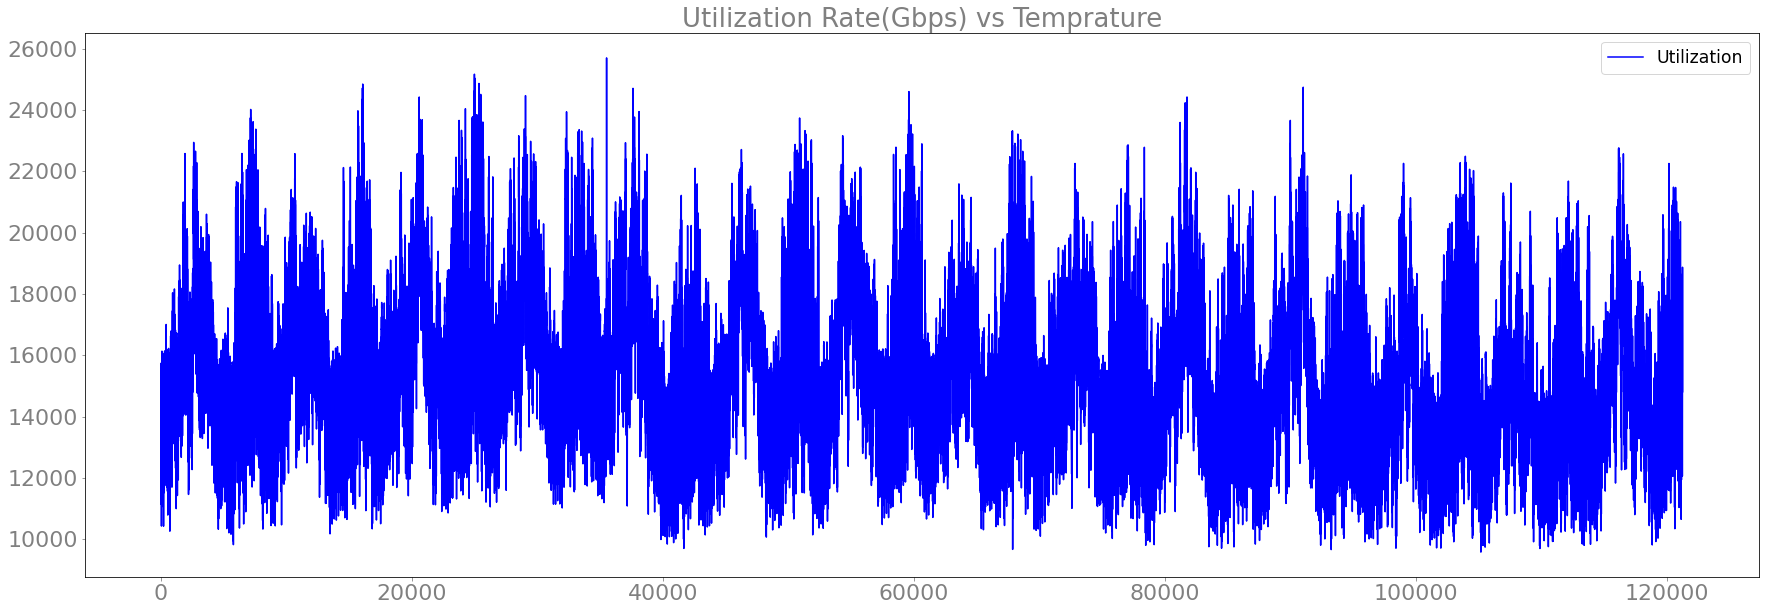

In [5]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.set_title("Utilization Rate(Gbps) vs Temprature", c='grey', size=26)
ax.plot(np.arange(0, len(df["Datetime"])), df["AEP_MW"], c='blue', label='Utilization')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

In [6]:
df["Date"] = df.Datetime.dt.date
df["Year"] = df.Datetime.dt.year
df["Month"] = df.Datetime.dt.month
df["Day"] = df.Datetime.dt.day
df["Hour"] = df.Datetime.dt.hour

weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df["Weekday"] = df.Datetime.dt.weekday.map(weekdays)

In [7]:
h = holidays.CountryHoliday('CA', prov='SK')
df["Holiday"] = df.apply(lambda x: 1 if ((x["Date"] in h) or x["Weekday"] in ["Saturday", "Sunday"]) else 0, axis=1)
df["WorkingHour"] = df.apply(lambda x: 0 if ((x["Holiday"]==1) or (x["Weekday"] in ["Saturday", "Sunday"]) or (not 8<=x["Hour"]<=18)) else 1, axis=1)

In [8]:
df.head()

,Datetime,AEP_MW,Date,Year,Month,Day,Hour,Weekday,Holiday,WorkingHour
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,1,Friday,0,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,1,2,Friday,0,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,1,3,Friday,0,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,1,4,Friday,0,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,1,5,Friday,0,0


In [9]:
mean_util_hourly = []
for hour in range(24):
    mean_util_hourly.append(df.loc[df["Hour"]==hour, "AEP_MW"].mean())

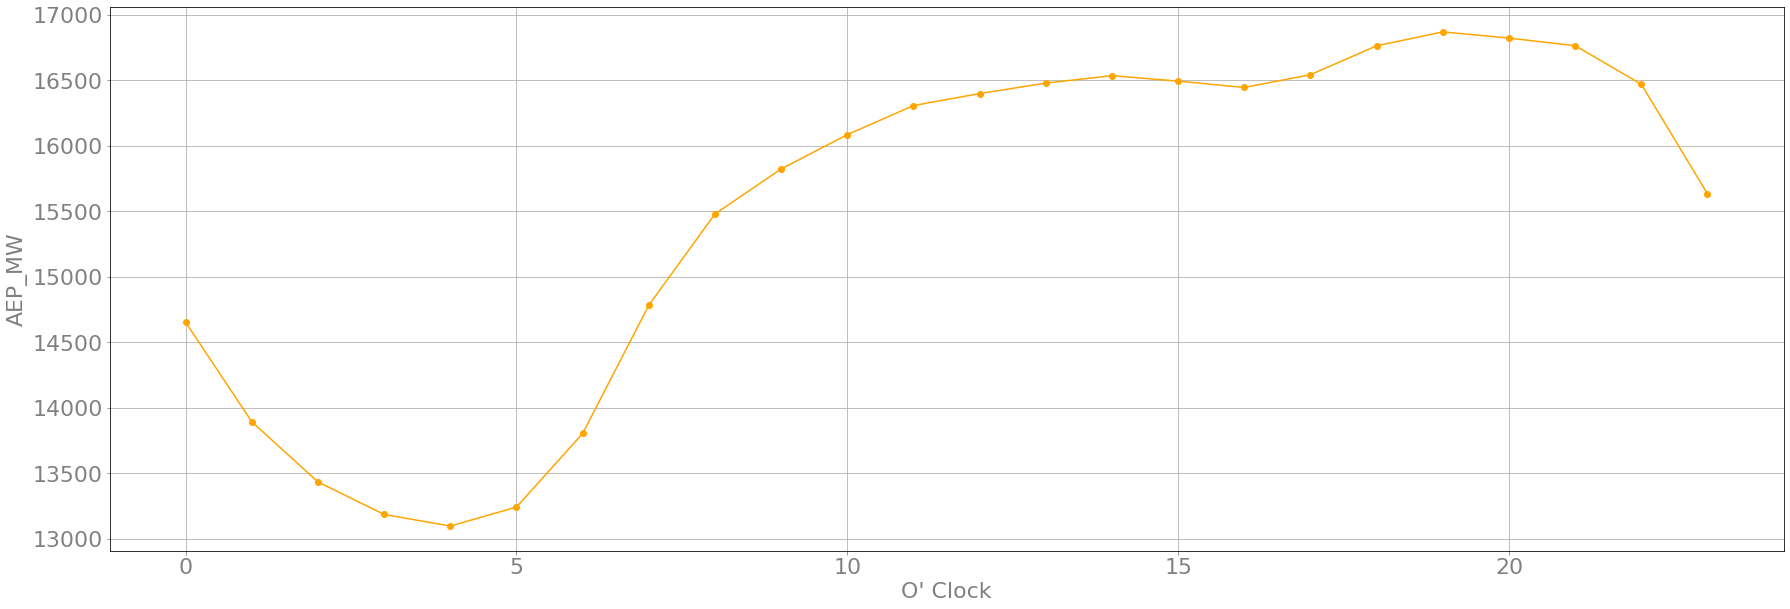

In [10]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.set_xlabel("O' Clock", color='grey', size=22)
ax.set_ylabel("AEP_MW", color='grey', size=22)
ax.plot(np.arange(24), mean_util_hourly, color='orange', marker='o')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.grid(True)
plt.show()

In [11]:
holiday_util_hourly = []
for hour in range(24):
    holiday_util_hourly.append(df.loc[(df["Hour"]==hour) & (df["Holiday"]==1), "AEP_MW"].mean())
    
non_holiday_util_hourly = []
for hour in range(24):
    non_holiday_util_hourly.append(df.loc[(df["Hour"]==hour) & (df["Holiday"]==0), "AEP_MW"].mean())

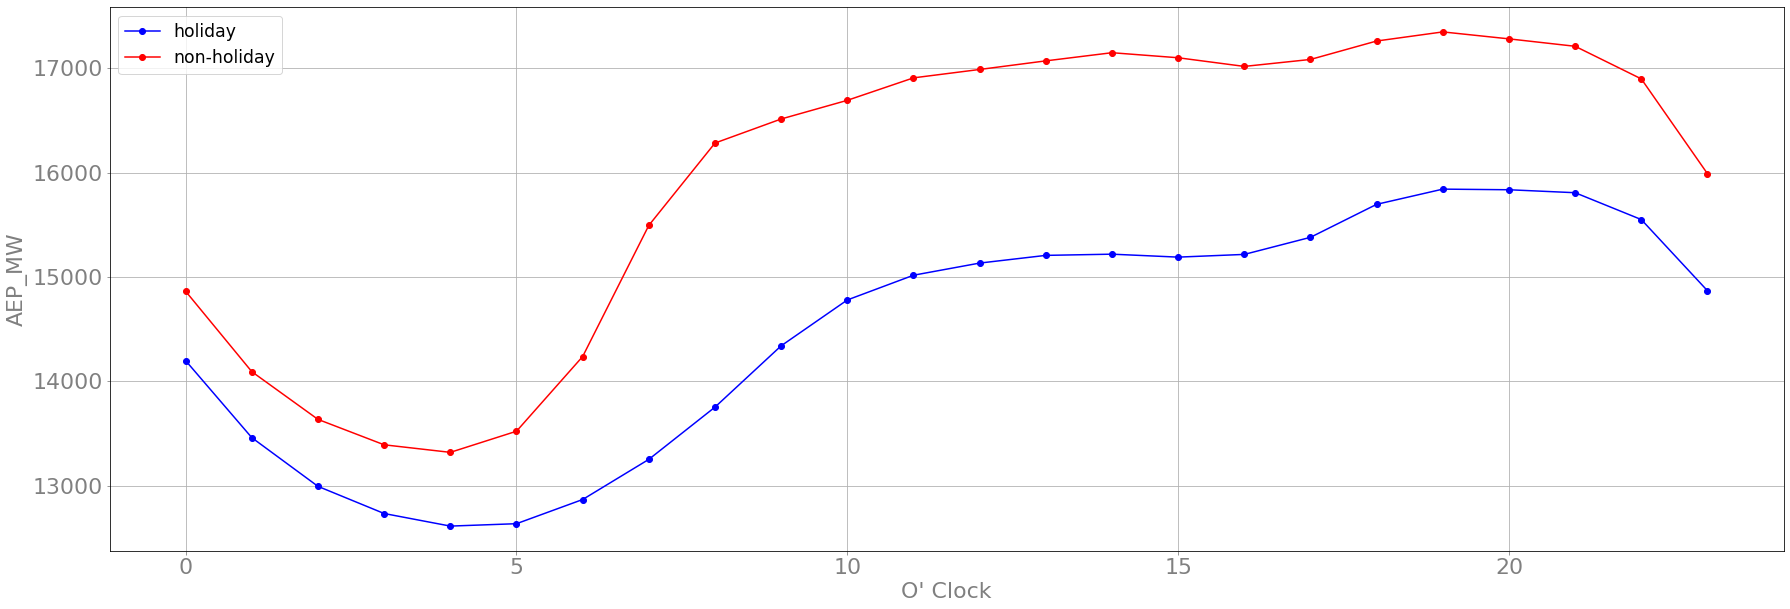

In [12]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.set_xlabel("O' Clock", color='grey', size=22)
ax.set_ylabel("AEP_MW", color='grey', size=22)
ax.plot(np.arange(24), holiday_util_hourly, color='blue', marker='o', label='holiday')
ax.plot(np.arange(24), non_holiday_util_hourly, color='red', marker='o', label='non-holiday')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.grid(True)
ax.legend(fontsize='xx-large')
plt.show()

In [13]:
plot_map = []
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
for hour in range(24):
    plot_map.append([])
    for day in list(weekdays.values()):
        plot_map[hour].append(df.loc[(df["Hour"]==hour) & (df["Weekday"]==day), "AEP_MW"].mean())

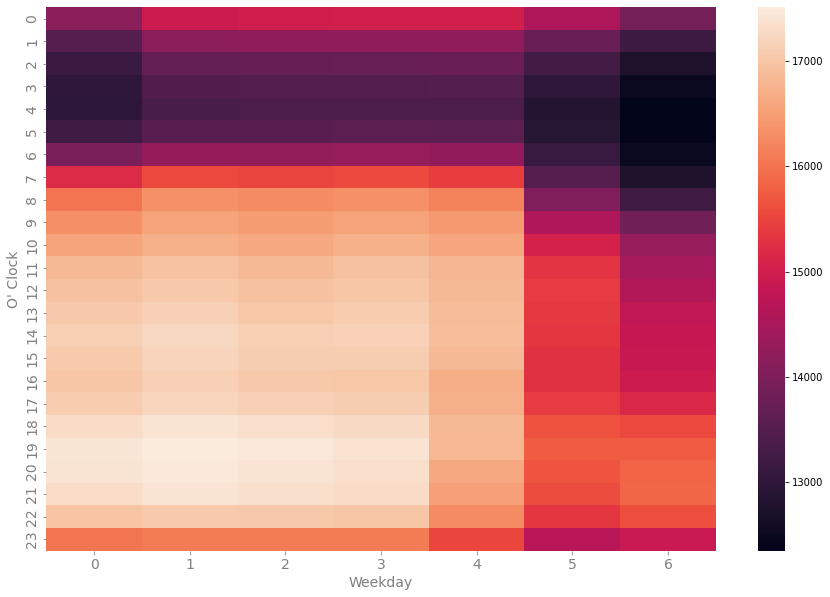

In [14]:
fig = plt.figure(figsize=(15,10))
ax=sns.heatmap(plot_map, linewidth=0)
ax.set_xlabel("Weekday", color='grey', size=14)
ax.set_ylabel("O' Clock", color='grey', size=14)
ax.tick_params(axis='x', colors='grey', labelsize=14)
ax.tick_params(axis='y', colors='grey', labelsize=14)
plt.show()

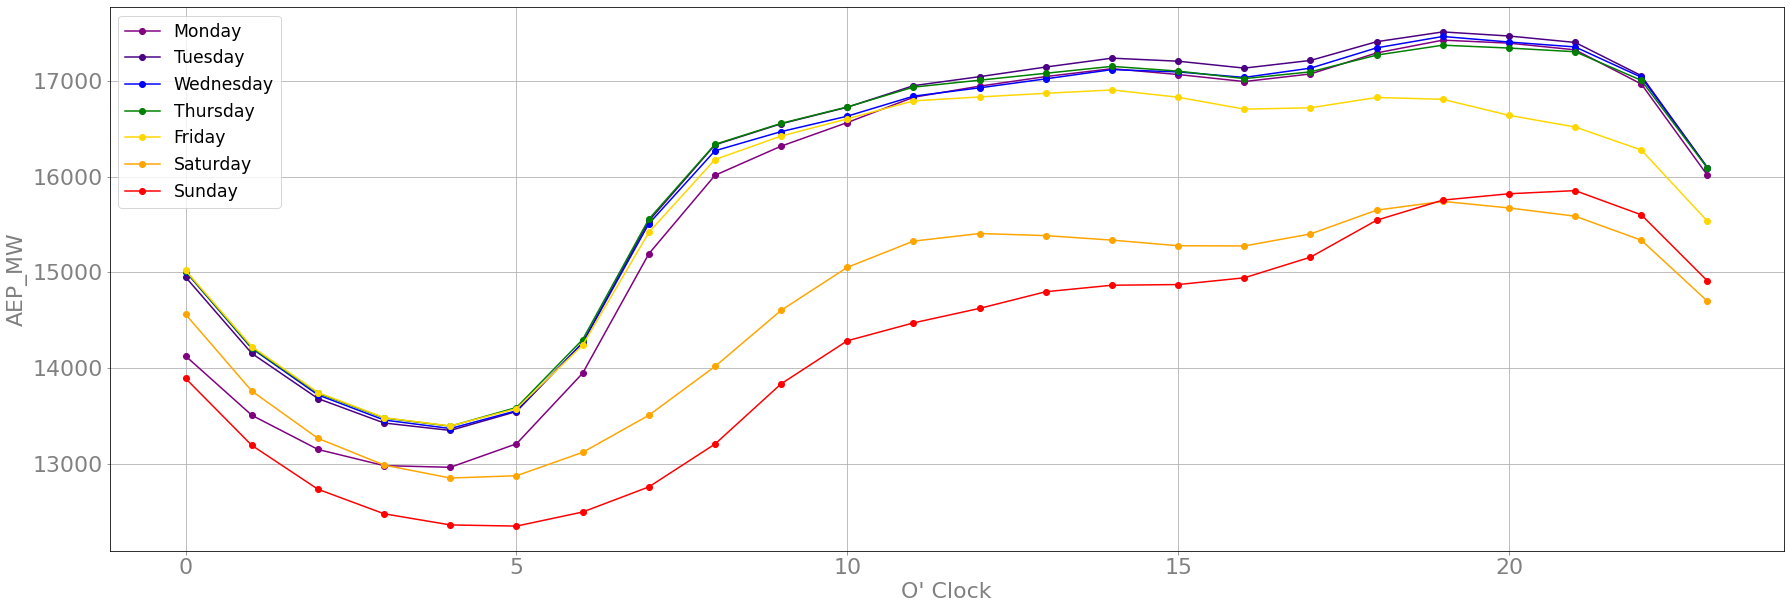

In [15]:
line_plot_map = np.transpose(plot_map)
colors = ['purple', 'indigo', 'blue', 'green', '#FFD700', 'orange', 'red']
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.set_xlabel("O' Clock", color='grey', size=22)
ax.set_ylabel("AEP_MW", color='grey', size=22)
for i, d in enumerate(labels):
    ax.plot(np.arange(24), line_plot_map[i], color=colors[i], marker='o', label=labels[i])
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.grid(True)
ax.legend(fontsize='xx-large')
plt.show()

In [16]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_avg = []
for i in range(1, 13):
    monthly_avg.append(df.loc[df["Month"]==i, "AEP_MW"].mean())

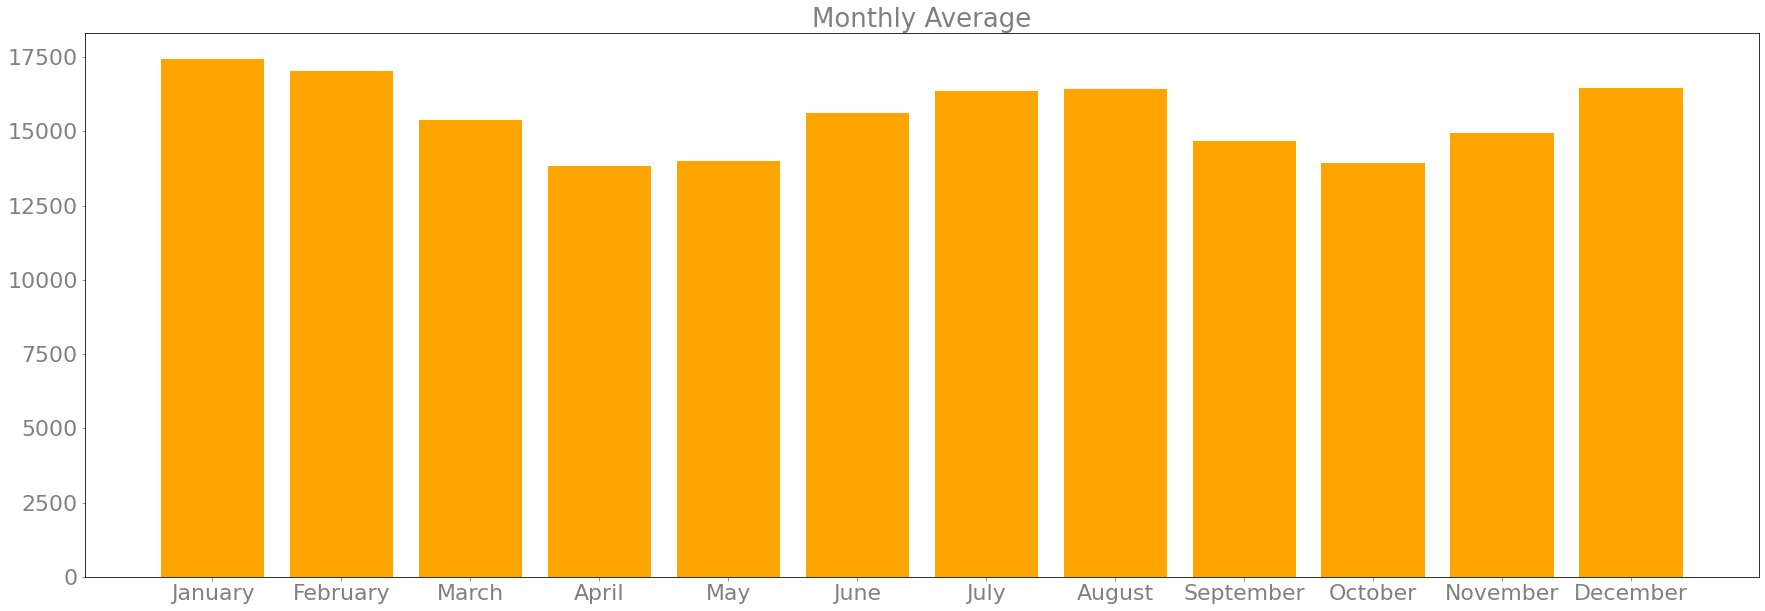

In [17]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.bar(months, monthly_avg, color="orange")
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.set_title("Monthly Average", c='grey', size=26)
plt.show()

In [18]:
seasons = ["Winter", "Summer/Spring", "Fall"]
seasonal_avg = []
for i in range(0, 12, 4):
    seasonal_avg.append(round(sum(monthly_avg[i:i+4])/4, 2))

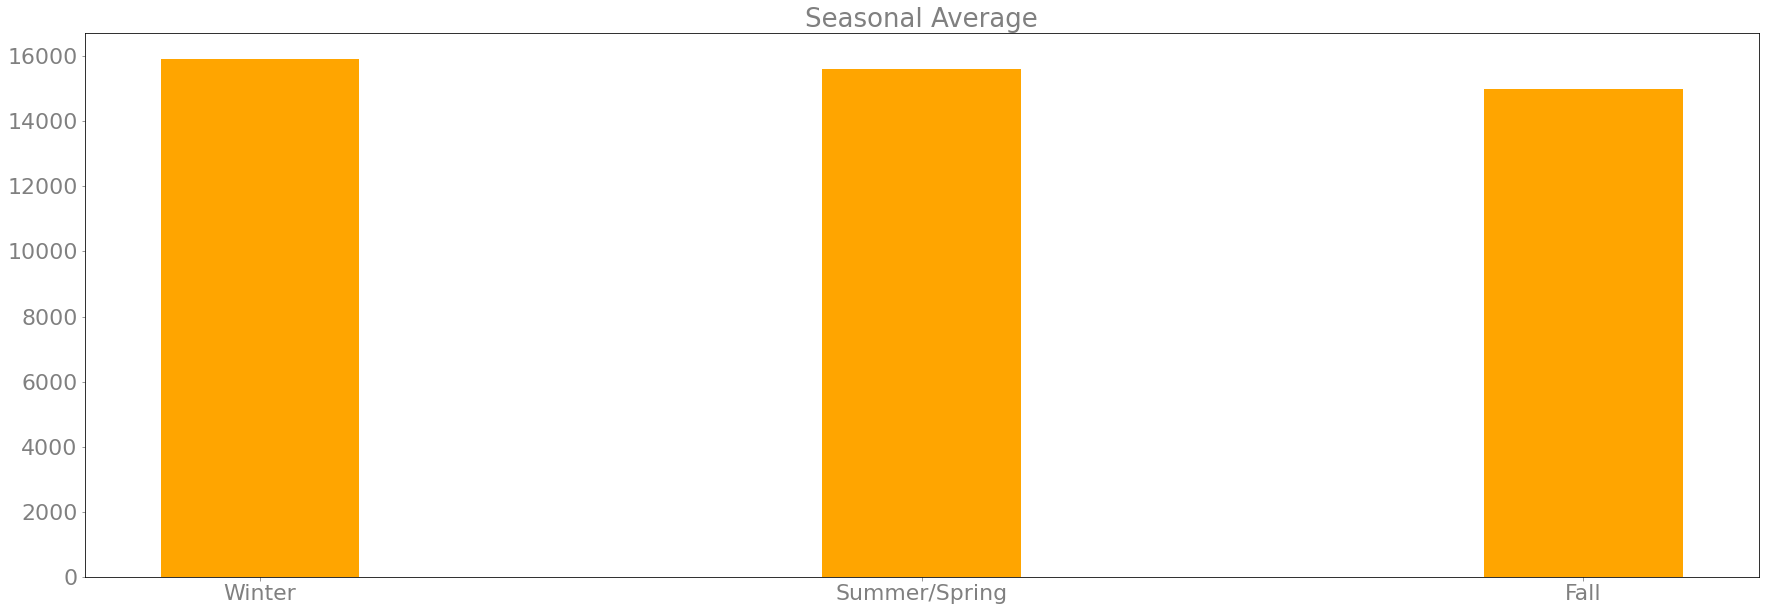

In [19]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.bar(seasons, seasonal_avg, color="orange", width=0.3)
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.set_title("Seasonal Average", c='grey', size=26)
plt.show()

In [20]:
df.to_csv("AEP_hourly_processed.csv", index=False)